# Predicting Critical Temperature of Superconductors using GradientBoosting Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='critical_temp', ylabel='Density'>

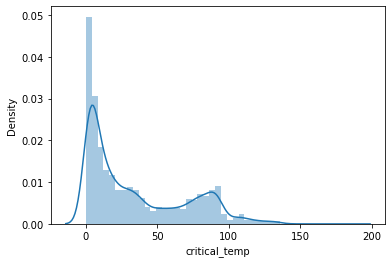

In [3]:
sns.distplot(dataset.critical_temp)

<AxesSubplot:>

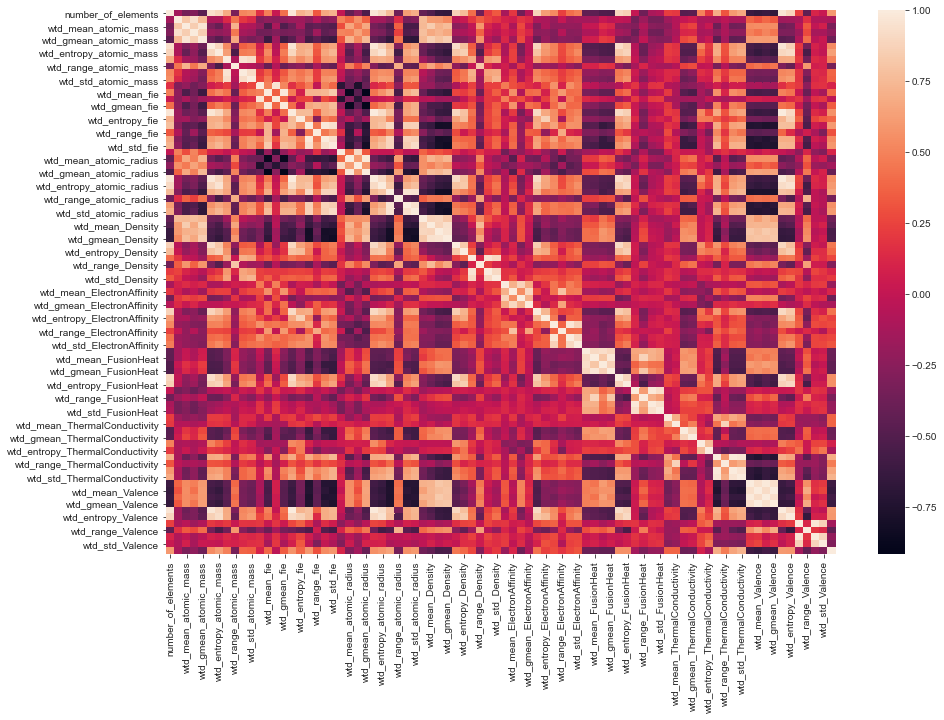

In [4]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)
sns.heatmap(dataset.corr(), ax=ax)

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

[[ 4.         88.9444675  57.86269229 ...  1.08571429  0.4330127
   0.43705882]
 [ 5.         92.729214   58.51841614 ...  1.12857143  0.63245553
   0.46860627]
 [ 4.         88.9444675  57.88524186 ...  1.11428571  0.4330127
   0.44469664]
 ...
 [ 2.         99.66319    95.609104   ...  3.2         0.5
   0.4       ]
 [ 2.         99.66319    97.0956022  ...  2.21        0.5
   0.46249324]
 [ 3.         87.46833333 86.8585     ...  1.8         1.41421356
   1.5       ]]


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Features Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature selection using the Correlation metric
For the correlation statistic we will use the f_regression() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

Feature 0: 9657.948
Feature 1: 208.175
Feature 2: 1802.900
Feature 3: 918.060
Feature 4: 2657.921
Feature 5: 7176.583
Feature 6: 11052.499
Feature 7: 5461.929
Feature 8: 2147.271
Feature 9: 2832.953
Feature 10: 2504.871
Feature 11: 162.265
Feature 12: 3196.541
Feature 13: 15.747
Feature 14: 2258.899
Feature 15: 8122.338
Feature 16: 3001.481
Feature 17: 9538.054
Feature 18: 1724.115
Feature 19: 6990.082
Feature 20: 8687.196
Feature 21: 199.438
Feature 22: 1650.195
Feature 23: 343.539
Feature 24: 3340.243
Feature 25: 7767.816
Feature 26: 9752.983
Feature 27: 12650.884
Feature 28: 2248.824
Feature 29: 7672.952
Feature 30: 9471.517
Feature 31: 2657.819
Feature 32: 3956.899
Feature 33: 7034.569
Feature 34: 7018.584
Feature 35: 4536.857
Feature 36: 3279.823
Feature 37: 1221.254
Feature 38: 1514.335
Feature 39: 214.831
Feature 40: 730.736
Feature 41: 682.181
Feature 42: 204.717
Feature 43: 2903.149
Feature 44: 203.222
Feature 45: 4045.452
Feature 46: 1018.121
Feature 47: 1413.985
Feature 48: 

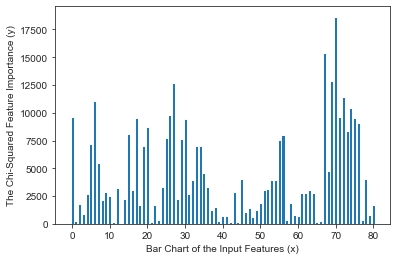

In [8]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# feature selection
def select_features(X_train, y_train, X_test):

# define number of features to evaluate
    num_features = [i+1 for i in range(X.shape[1])]
# enumerate each number of features
    results = list()
    for k in num_features:
        fs = SelectKBest(score_func=f_regression, k= k)
	# learn relationship from training data
        fs.fit(X_train, y_train)
	# transform train input data
        X_train_fs = fs.transform(X_train)
	# transform test input data
        X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %.3f' % (i, np.mean(fs.scores_[i])) ) 
    
    # plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel("Bar Chart of the Input Features (x)")
plt.ylabel("The Chi-Squared Feature Importance (y)")
plt.show()

## Training the GradientBoostingRegressor model on the Training set

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'
 |      loss function to be optimized. 'ls' refers to least squares
 |      regression. 'lad' (least absolute deviation) is a highly robust
 |      loss function solely based on order information of the input
 |      variables. 'huber' is a combination of the two. 'quantile'
 |      allows quantile regression (use `alpha` to specify the quantile).
 |  
 |  learning_rate : float, default=0.1
 | 

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[1,5,10,50],
              'learning_rate':[0.1,0.05,0.2],       
              'max_depth':[3,4,5]}
model = GradientBoostingRegressor()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_fs, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [1, 5, 10, 50]})

In [12]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}

## Predicting the Test set results

In [26]:
y_pred = model.predict(X_test_fs)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 3.22 10.8 ]
 [20.69 21.5 ]
 [ 5.76  5.27]
 ...
 [10.4  13.8 ]
 [ 5.46  0.96]
 [21.05 17.2 ]]


Text(0, 0.5, 'Predicted Critical Temperature (K)')

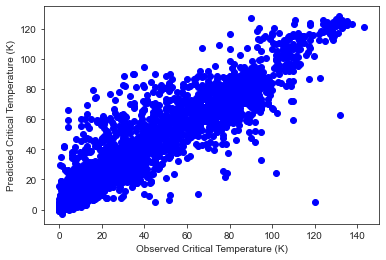

In [27]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

124.6073396900655

In [29]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

11.1627657724269

In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = grid, X = X_train_fs, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.13 %
Standard Deviation: 0.42 %


In [33]:
accuracies_test = cross_val_score(estimator = grid, X = X_test_fs, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.13 %
Standard Deviation: 0.42 %


In [34]:
feat_import= grid.best_estimator_.feature_importances_